In [1]:
# Let's get caught up first
# Import the tools we need: pandas for data, matplotlib for charts, scikit-learn for ML models
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import warnings  # Suppressing warnings will keep our notebooks clean 

warnings.filterwarnings('ignore')   # Hides all warning messages

# Load the CSV file into a DataFrame so we can work with it in Python
df = pd.read_csv("Titanic Dataset.csv")
print(f"✓ Dataset loaded: {df.shape}")      # Show number of rows and columns

# Keep only the columns we need for our model (removes extra/unnecessary data)
df = df[['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
print(f"✓ Features selected: {df.shape[1]} columns")

# Convert "fare" to a numeric type (non-numeric values turn into NaN if needed)
df['fare'] = pd.to_numeric(df['fare'], errors='coerce')

# Fill missing ages/fares with the median and remove rows missing "embarked"
df['age'].fillna(df['age'].median(), inplace=True)     # Replace missing ages
df['fare'].fillna(df['fare'].median(), inplace=True)   # Replace missing fares
df.dropna(subset=['embarked'], inplace=True)           # Drop rows missing a category
print(f"✓ Missing values handled: {df.isnull().sum().sum()} remaining")

# Convert text columns ("sex", "embarked") into numeric dummy variables for ML
df = pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True)
print(f"✓ Categorical variables encoded")

# Split data into features (X) the model uses, and the target (y) we want to predict
X = df.drop('survived', axis=1)    # All columns except the answer
y = df['survived']                 # The column we want to predict

print(f"\n✓ Data preparation complete!")
print(f"X shape: {X.shape} (rows, features)")   # How many rows/features we have
print(f"y shape: {y.shape} (rows)")             # Number of target labels
print(f"Feature names: {X.columns.tolist()}")  # The final features used for ML
print(f"\nSurvival rate: {y.mean():.2%}")      # Quick look at target distribution

✓ Dataset loaded: (1309, 14)
✓ Features selected: 8 columns
✓ Missing values handled: 0 remaining
✓ Categorical variables encoded

✓ Data preparation complete!
X shape: (1307, 8) (rows, features)
y shape: (1307,) (rows)
Feature names: ['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male', 'embarked_Q', 'embarked_S']

Survival rate: 38.10%


In [2]:
from sklearn.model_selection import train_test_split

# Split: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 20% for testing
    random_state=42     # Reproducible results
)

print(f"Training: {X_train.shape[0]} passengers")
print(f"Testing: {X_test.shape[0]} passengers")

Training: 1045 passengers
Testing: 262 passengers


In [3]:
from sklearn.tree import DecisionTreeClassifier

# Create model
model = DecisionTreeClassifier(
    max_depth=4,        # Limits tree depth (prevents overfitting)
    random_state=42     # Reproducible tree
)

# Train model (this is where learning happens!)
model.fit(X_train, y_train)

print("✓ Model trained!")
print(f"Tree depth: {model.get_depth()}")
print(f"Leaves: {model.get_n_leaves()}")

✓ Model trained!
Tree depth: 5
Leaves: 29


In [4]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Detailed metrics
print(classification_report(y_test, y_pred, 
                          target_names=['Died', 'Survived']))

Accuracy: 75.95%
              precision    recall  f1-score   support

        Died       0.74      0.92      0.82       156
    Survived       0.82      0.52      0.64       106

    accuracy                           0.76       262
   macro avg       0.78      0.72      0.73       262
weighted avg       0.77      0.76      0.75       262



      feature  importance
5    sex_male    0.559808
0      pclass    0.187437
1         age    0.109661
4        fare    0.093686
2       sibsp    0.045583
3       parch    0.003825
6  embarked_Q    0.000000
7  embarked_S    0.000000


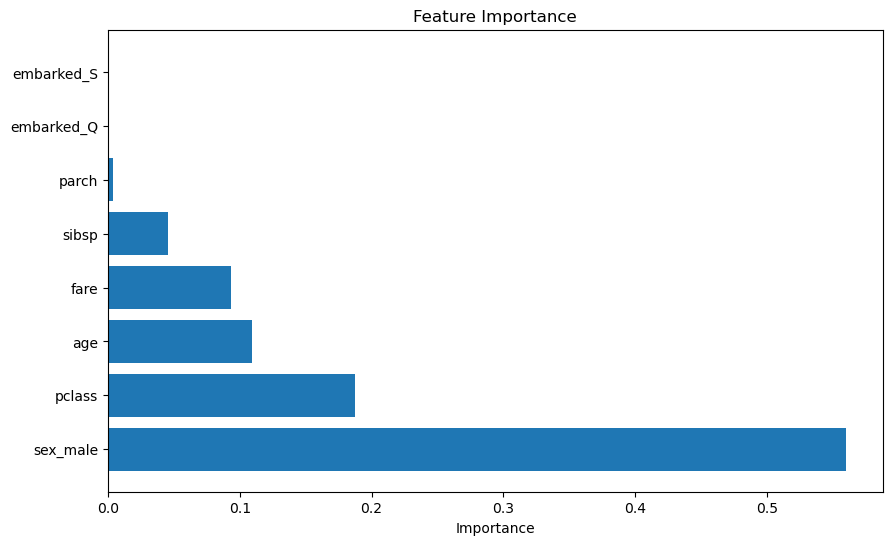

In [5]:
# Which features mattered most?
importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print(importance)

# Visualize
plt.figure(figsize=(10, 6))
plt.barh(importance['feature'], importance['importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

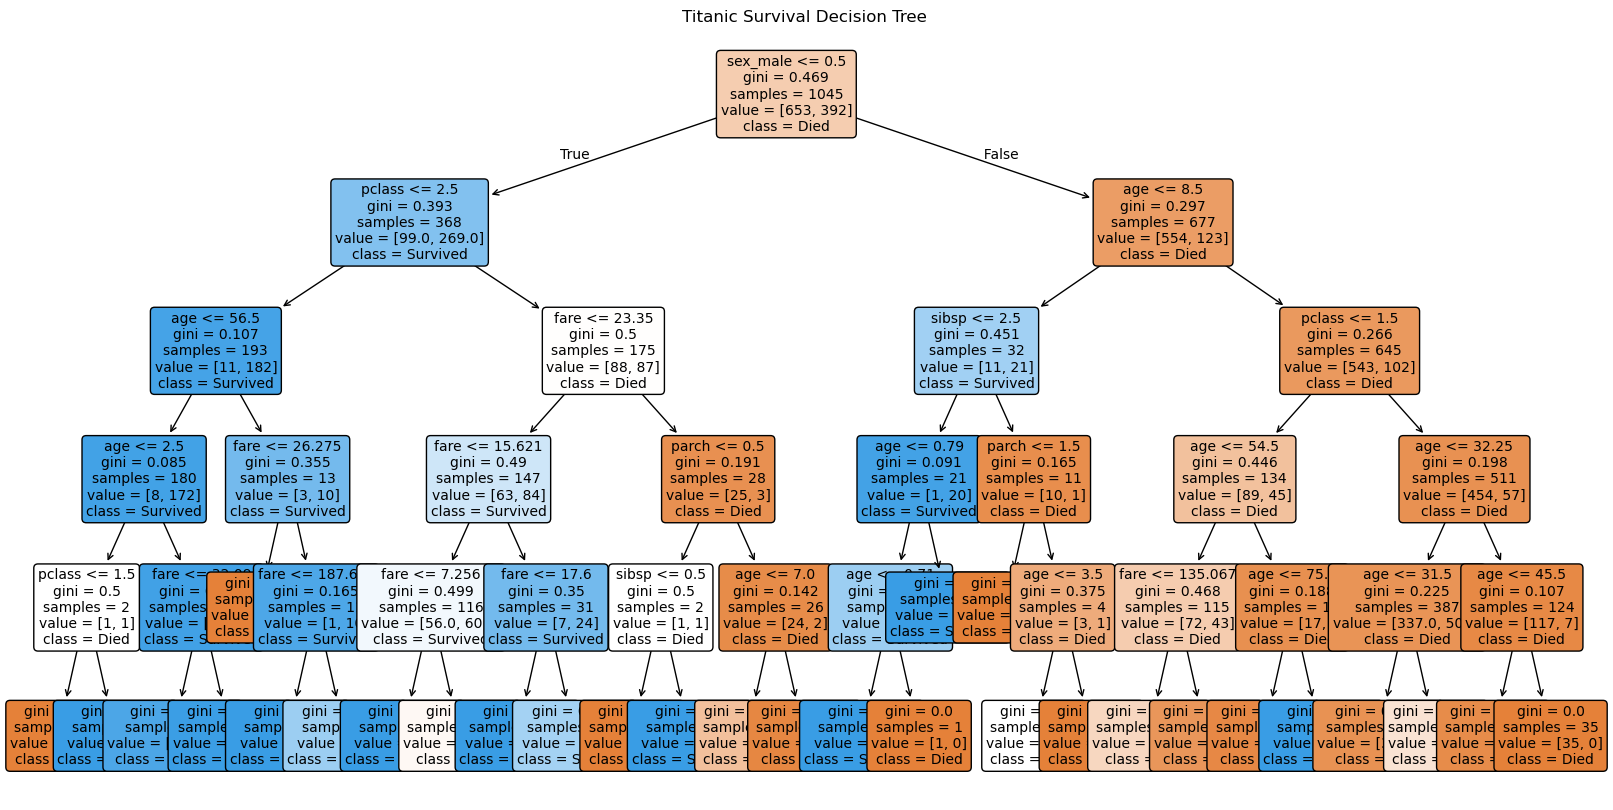

In [6]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(model, 
          feature_names=X.columns,
          class_names=['Died', 'Survived'],
          filled=True,      # Color by prediction
          rounded=True,     # Rounded boxes
          fontsize=10)
plt.title("Titanic Survival Decision Tree")
plt.show()

In [7]:
# Create hypothetical passenger
# Order: [pclass, age, sibsp, parch, fare, sex_male, embarked_Q, embarked_S]
new_passenger = [[3, 25, 0, 0, 7.25, 1, 0, 1]]
# 3rd class, 25yo male, no family, low fare, boarded at S

# Make prediction
prediction = model.predict(new_passenger)
probability = model.predict_proba(new_passenger)

print(f"Prediction: {'Survived' if prediction[0] == 1 else 'Died'}")
print(f"Survival probability: {probability[0][1]:.2%}")

Prediction: Died
Survival probability: 11.59%


In [10]:
woman_1st = [[1, 25, 0, 0, 100, 0, 0, 1]]
# Make prediction
prediction = model.predict(woman_1st)
probability = model.predict_proba(woman_1st)

print(f"Prediction: {'Survived' if prediction[0] == 1 else 'Died'}")
print(f"Survival probability: {probability[0][1]:.2%}")

Prediction: Survived
Survival probability: 99.08%


In [11]:
man_3rd = [[3, 65, 0, 0, 7.25, 1, 0, 1]]
# Make prediction
prediction = model.predict(man_3rd)
probability = model.predict_proba(man_3rd)

print(f"Prediction: {'Survived' if prediction[0] == 1 else 'Died'}")
print(f"Survival probability: {probability[0][1]:.2%}")

Prediction: Died
Survival probability: 0.00%


In [12]:
boy_3rd = [[3, 5, 1, 2, 20, 1, 0, 1]]
# Make prediction
prediction = model.predict(boy_3rd)
probability = model.predict_proba(boy_3rd)

print(f"Prediction: {'Survived' if prediction[0] == 1 else 'Died'}")
print(f"Survival probability: {probability[0][1]:.2%}")

Prediction: Survived
Survival probability: 100.00%
